In [3]:
import numpy as np
import math
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt

In [4]:
class LMSTrainer(BaseEstimator):
    def __init__(self, delta, alpha, tolerancia, analitic=False):
        self.analitic = analitic
        self._trained = False
        self.analitic = analitic
        self._trained = False
        self._delta = delta  # vetor de parametros
        self._alpha = alpha  # taxa de convergencias
        self._tolerancia = tolerancia  # erro maximo
        self._custoAnt = 0.0  # quarda o custo da iteracao anterior
        self._max = 999999  # quantidade maxima de iteracoes
        self._it = 0  # iteracao atual
        self._epslon = 0.000001 # evita o valor zero dentro do log

    def fit(self, X, y=None):
        if self.analitic:
            # TODO: FAZER POR MATRIZES
            pass
        else:
            Xi = np.insert(X, 0, values=1, axis=1)
            self.grad(Xi, y)
        self._trained = True

        return self

    def predict(self, X, y=None):
        if not self._trained:
            raise RuntimeError("You must train classifer before predicting data!")
        else:
            # Xi = np.insert(X, 0, values=1, axis=1)
            Xi = [1] + X
            return self.h(Xi)

    def h(self, x):
        #if type(x) is int:
        #   x = [1, x]
        return 1. / (1. + math.e ** -(np.dot(self._delta, x)))
        # if type(x) is int:
        #    return self.funcAfim(x)
        # else:
        #    return np.dot(x, self._delta)

    def custo(self, X, y, n):
        error = 0.0
        for i, x in enumerate(X):
            error += (-y[i] * math.log(self.h(x)+self._epslon)) - ((1 - y[i]) * math.log(1 - self.h(x)+self._epslon))  # (self.h(x) - y[i])**2
        return error / n

    def convergiu(self, X, y, n):
        self._it += 1
        custo_atual = self.custo(X, y, n)
        flag1 = self._it >= self._max
        flag2 = np.abs(custo_atual - self._custoAnt) <= self._tolerancia
        self._custoAnt = custo_atual

        return flag1 or flag2

    def grad(self, X, y):
        m = len(y)
        while not self.convergiu(X, y, m):
            tmp = []
            qtd = len(self._delta)
            for i in range(qtd):
                tmp.append(self._delta[i] - self._alpha * self.sumDiff(X, y, m, i))
            self._delta = np.copy(tmp)
        if self._it >= self._max:
            print("número máximo de iterações alcançado.")

    def sumDiff(self, X, y, n, j):
        sum = 0.0
        for i, x in enumerate(X):
            sum += ((self.h(x) - y[i]) * x[j])
        return sum / n

    def funcAfim(self, x):
        return self._delta[0] + self._delta[1] * x

    def getDelta(self):
        return self._delta


In [5]:
class DrawingGraph:
    Id = 1

    @staticmethod
    def draw_point(x, y):
        plt.scatter(x, y, s=10, c='r' )

    @staticmethod
    def draw(x, f, title): # valores x e função f
        plt.figure(DrawingGraph.Id)
        DrawingGraph.Id += 1
        plt.plot(x, [f(a) for a in x])
        plt.title(title)
        # plt.show()


    def draw_point2(x, y):
        plt.scatter(x, y, s=10, c='b')
        plt.show()

    @staticmethod
    def draw_classification(x, y, title):
        plt.figure(DrawingGraph.Id)
        plt.title(title)
        DrawingGraph.Id += 1
        temp0y = []
        temp0x = []
        temp1y = []
        temp1x = []
        for i, yi in enumerate(y):
            if yi <= 0.5:
                temp0y += [yi]
                temp0x += [x[i]]
            else:
                temp1y += [yi]
                temp1x += [x[i]]
        plt.axis((min(x)[0]-1, max(x)[0]+1, -0.5, 1.5))
        plt.scatter(temp0x, temp0y, s=50, c='r')
        plt.scatter(temp1x, temp1y, s=50, c='b')
        #plt.show()

    @staticmethod
    def show():
        plt.show()

deltas:  [1, 1]
deltas:  [-16.68721431   3.05564592]


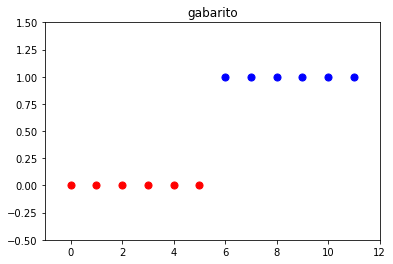

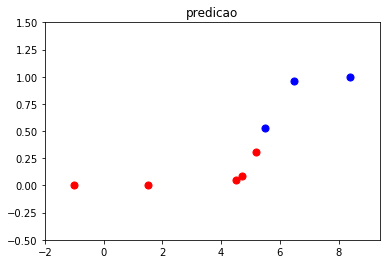

In [8]:
x_train = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]

y_train = [0,0,0,0,0,0,1,1,1,1,1,1]

x_teste =[[-1],[1.5],[8.4],[4.5], [5.5],[4.7],[6.5],[5.2]]

trainer = LMSTrainer([1,1], 0.1, 0.000001)


print("deltas: ", trainer.getDelta())

pred = trainer.fit(x_train, y_train)

DrawingGraph.draw_classification(x_train, y_train, "gabarito")
print("deltas: ", trainer.getDelta())

resposta = [pred.predict(x) for x in x_teste]
# print("resposta = ", resposta)
DrawingGraph.draw_classification(x_teste, resposta, "predicao")

DrawingGraph.show()